In [3]:
import torch
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
data=pd.read_csv(r'/content/gdrive/My Drive/MyDataSets/Salary_Data.csv')

In [7]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [179]:
data['Salary'].shape[0]

30

In [313]:
from sklearn import preprocessing
x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=data.columns)

In [314]:
df

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514
5,0.191489,0.223376
6,0.202128,0.264812
7,0.223404,0.197425
8,0.223404,0.315545
9,0.276596,0.229837


In [339]:
input=torch.tensor(df['YearsExperience']).reshape(1,df['YearsExperience'].shape[0])
output=torch.tensor(df['Salary']).reshape(1,df['Salary'].shape[0])

In [340]:
weight=torch.randn(size=tuple(input.shape),requires_grad=True,dtype=input.dtype)
bias=torch.rand(30,requires_grad=True,dtype=input.dtype)

In [317]:
bias


tensor([0.4534, 0.6020, 0.1943, 0.3616, 0.1324, 0.4164, 0.5801, 0.1029, 0.8787,
        0.2802, 0.1480, 0.9024, 0.0647, 0.5066, 0.6180, 0.3786, 0.6795, 0.3606,
        0.1286, 0.0044, 0.1582, 0.6941, 0.1661, 0.4233, 0.6995, 0.4924, 0.2069,
        0.3810, 0.8249, 0.2868], dtype=torch.float64, requires_grad=True)

In [318]:
weight

tensor([[ 0.5345,  1.6918, -0.1837, -1.9291,  0.5643,  0.9806, -0.9131, -1.3569,
          0.0944, -0.5760,  0.4150, -0.5126, -1.1063, -0.7298,  0.3816,  0.3188,
         -0.9048,  0.1581, -0.3066,  0.0519,  1.0745, -0.0076,  0.8364,  1.6035,
          2.1600, -1.1113, -2.3328,  1.2437,  1.5201, -0.7509]],
       dtype=torch.float64, requires_grad=True)

In [341]:
def model(x):
    return x@(weight.T)+bias

In [342]:
pred=model(input)

In [321]:
pred

tensor([[2.1914, 2.3400, 1.9323, 2.0996, 1.8704, 2.1543, 2.3180, 1.8408, 2.6166,
         2.0182, 1.8859, 2.6403, 1.8026, 2.2445, 2.3559, 2.1165, 2.4174, 2.0985,
         1.8666, 1.7424, 1.8962, 2.4320, 1.9040, 2.1612, 2.4374, 2.2303, 1.9448,
         2.1189, 2.5629, 2.0248]], dtype=torch.float64, grad_fn=<AddBackward0>)

In [322]:
output

tensor([[0.0190, 0.1001, 0.0000, 0.0684, 0.0255, 0.2234, 0.2648, 0.1974, 0.3155,
         0.2298, 0.3011, 0.2134, 0.2271, 0.2286, 0.2762, 0.3568, 0.3343, 0.5358,
         0.5154, 0.6639, 0.6379, 0.7151, 0.7509, 0.8987, 0.8469, 0.8015, 0.9360,
         0.8848, 1.0000, 0.9939]], dtype=torch.float64)

In [323]:
def mse(d1,d2):
    diff=d1-d2
    return torch.sum(diff*diff)/diff.numel()

In [324]:
loss=mse(output,pred)

In [325]:
loss

tensor(3.0117, dtype=torch.float64, grad_fn=<DivBackward0>)

In [326]:
loss.backward()

In [327]:
weight.grad

tensor([[0.0000, 0.0719, 0.1438, 0.3236, 0.3956, 0.6473, 0.6832, 0.7551, 0.7551,
         0.9349, 1.0069, 1.0428, 1.0428, 1.0788, 1.2226, 1.3665, 1.4384, 1.5103,
         1.7261, 1.7620, 2.0497, 2.1576, 2.4452, 2.5531, 2.7329, 2.8408, 3.0206,
         3.0566, 3.3083, 3.3802]], dtype=torch.float64)

In [328]:
bias.grad

tensor([0.1448, 0.1493, 0.1288, 0.1354, 0.1230, 0.1287, 0.1369, 0.1096, 0.1534,
        0.1192, 0.1057, 0.1618, 0.1050, 0.1344, 0.1387, 0.1173, 0.1389, 0.1042,
        0.0901, 0.0719, 0.0839, 0.1145, 0.0769, 0.0842, 0.1060, 0.0953, 0.0673,
        0.0823, 0.1042, 0.0687], dtype=torch.float64)

In [343]:
epochs=500
for i in range(epochs):
    pred=model(input)
    loss=mse(output,pred)
    loss.backward()
    with torch.no_grad():
        weight-=1e-1*weight.grad
        bias-=1e-1*bias.grad
        weight.grad.zero_()
        bias.grad.zero_()

In [344]:
loss

tensor(0.0002, dtype=torch.float64, grad_fn=<DivBackward0>)

In [345]:
pred

tensor([[0.0443, 0.1129, 0.0178, 0.0746, 0.0462, 0.2312, 0.2587, 0.1977, 0.3244,
         0.2261, 0.2917, 0.2351, 0.2439, 0.2386, 0.3003, 0.3467, 0.3271, 0.5487,
         0.5269, 0.6516, 0.6315, 0.7155, 0.7515, 0.8723, 0.8362, 0.7913, 0.9045,
         0.8544, 0.9865, 0.9737]], dtype=torch.float64, grad_fn=<AddBackward0>)

In [346]:
output

tensor([[0.0190, 0.1001, 0.0000, 0.0684, 0.0255, 0.2234, 0.2648, 0.1974, 0.3155,
         0.2298, 0.3011, 0.2134, 0.2271, 0.2286, 0.2762, 0.3568, 0.3343, 0.5358,
         0.5154, 0.6639, 0.6379, 0.7151, 0.7509, 0.8987, 0.8469, 0.8015, 0.9360,
         0.8848, 1.0000, 0.9939]], dtype=torch.float64)

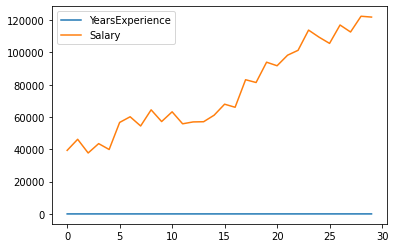

In [284]:
data.plot()

In [240]:
pred.detach().numpy().reshape(30,)

array([0.74494548, 0.88994131, 0.76987278, 1.2031192 , 0.81141043,
       1.17820521, 1.56275597, 0.79605598, 1.48443652, 1.51237385,
       1.07993748, 1.37131456, 1.19924926, 1.49613088, 0.60139839,
       1.11298444, 1.31216443, 0.98819264, 0.72340465, 1.01838597,
       1.27322229, 1.18998057, 0.83877849, 1.08743315, 1.46903742,
       0.61258297, 0.88175317, 1.06469297, 0.84321618, 0.98950853])

In [347]:
df['PredictedSalary']=pd.Series(pred.detach().numpy().reshape(30,))

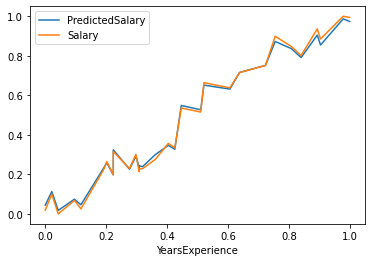

In [348]:
df.plot(x='YearsExperience',y=['PredictedSalary','Salary'])

,YearsExperience,Salary,PredictedSalary
0,0.000000,0.019041,0.744945
1,0.021277,0.100094,0.889941
2,0.042553,0.000000,0.769873
3,0.095745,0.068438,1.203119
4,0.117021,0.025514,0.811410
5,0.191489,0.223376,1.178205
6,0.202128,0.264812,1.562756
7,0.223404,0.197425,0.796056
8,0.223404,0.315545,1.484437
9,0.276596,0.229837,1.512374
